In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Data/nba_stats_20-21.csv")

In [3]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,Delon Wright\wrighde01,SG-PG,28,TOT,63,39,27.7,3.8,8.2,...,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
536,537,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
537,538,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
538,539,Cody Zeller\zelleco01,C,28,CHO,48,21,20.9,3.8,6.8,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [4]:
df.shape

(540, 30)

In [5]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [6]:
df.isnull().sum().sum()

44

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.00000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,25.555556,42.692593,20.000000,19.820926,3.287963,7.162593,0.446874,1.002593,2.81500,...,0.728594,0.817407,2.817222,3.635000,1.987593,0.617778,0.415000,1.093889,1.635185,8.942407
std,156.028843,4.108305,20.706670,23.176183,9.308218,2.345228,4.830470,0.108615,0.904920,2.27559,...,0.193606,0.732288,1.825845,2.392299,1.864952,0.387680,0.408555,0.837447,0.759005,6.483883
min,1.000000,19.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.750000,22.000000,26.750000,1.000000,12.575000,1.575000,3.600000,0.402750,0.300000,0.97500,...,0.670500,0.300000,1.475000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.100000
50%,270.500000,25.000000,46.000000,8.000000,19.600000,2.800000,6.050000,0.441500,0.800000,2.30000,...,0.773000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.350000
75%,405.250000,28.000000,61.000000,38.000000,27.700000,4.600000,9.825000,0.496250,1.600000,4.32500,...,0.843000,1.100000,3.800000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,12.400000
max,540.000000,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.70000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [10]:
player_name = []
for k in range(0,len(df)):
    player_name.append(df['Player'].loc[k].split("\\")[0])
df['Player'] = player_name

In [11]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,...,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
536,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
537,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
538,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [12]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [13]:
df.drop(columns=['Rk', 'Pos', 'Age', 'Tm', 'G', 'GS'], inplace=True)

In [14]:
df

,Player,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,...,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,...,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
536,Thaddeus Young,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
537,Trae Young,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
538,Cody Zeller,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [15]:
scalar = StandardScaler()
df1 = df.drop("Player", axis = 1)
scalar.fit(df1)
df2 = scalar.transform(df1)

In [16]:
df2 = pd.DataFrame(df2, columns=df1.columns)

In [17]:
df2

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,-0.830243,-0.549694,-0.717488,0.895053,-1.108962,-1.238189,-2.212642,-0.153723,-0.191496,0.283331,...,-1.135285,0.522946,-0.338361,-0.098323,-0.798397,-0.820451,0.208243,-0.470781,-0.178274,-0.608596
1,-1.851793,-1.360601,-1.256237,-2.966193,-1.108962,-1.106233,-2.212642,-1.167349,-1.013124,-2.617590,...,-3.766772,-1.117273,-1.325120,-1.353509,-0.905738,-1.595003,-1.016716,-1.307430,-2.024505,-1.334142
2,0.847249,0.005137,-0.385950,1.540129,-1.108962,-1.194204,-2.212642,0.539810,0.278006,0.849738,...,-1.471329,3.940070,1.306237,2.202852,-0.047011,0.728653,0.698227,0.246347,0.349221,-0.207230
3,1.470932,1.626951,1.105970,1.134652,-1.108962,-1.194204,-0.380176,2.567060,2.361420,0.489993,...,0.363991,1.889796,2.128537,2.244692,1.831453,1.503205,1.433202,1.800124,0.876716,1.506295
4,0.653692,0.901403,0.878038,0.240760,0.218351,0.125358,0.631346,1.019948,1.158322,-0.030489,...,0.741395,-0.160478,0.538758,0.361912,-0.047011,-0.562267,1.678194,-0.112217,0.217347,0.703563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.847249,0.218534,0.214962,0.148607,-0.002868,-0.050583,0.514068,0.273066,0.336694,0.000128,...,0.379501,0.249577,0.209839,0.278233,1.294749,2.535941,0.208243,0.246347,-0.573895,0.194137
536,0.481642,0.901403,0.525779,1.033283,-0.887743,-0.930291,-0.255568,1.606784,1.393072,0.543572,...,-0.520065,2.299850,0.538758,1.073184,1.241078,1.245021,0.453235,1.082996,0.744842,0.487443
537,1.492439,1.883027,2.183468,-0.081778,1.324446,1.532891,0.301502,1.766830,2.038637,-0.137647,...,0.813773,-0.297163,0.264658,0.110875,3.978269,0.470469,-0.526732,3.592943,0.217347,2.525147
538,0.116035,0.218534,-0.075133,1.033283,-0.998353,-0.974277,-1.164471,0.753205,0.542101,0.681347,...,-0.075452,2.299850,0.867678,1.324222,-0.100682,-0.045899,-0.036749,0.007304,1.140463,0.070639


In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

inertia = []
sill = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
    sill.append(metrics.silhouette_score(df2, labels=kmeans.labels_))

In [19]:
data = {"Numero de Cluster": range(2,11),
        "Inertia" : inertia,
       "Silhouette" : sill}

comparacao = pd.DataFrame(data).set_index('Numero de Cluster')
comparacao

,Inertia,Silhouette
Numero de Cluster,,
2,8158.703220,0.315283
3,6730.994597,0.232067
4,5817.239575,0.236462
5,5127.170023,0.235615
6,4711.749573,0.190460
7,4460.475218,0.194477
8,4259.692143,0.153298
9,4102.648215,0.160626
10,3917.029950,0.146899


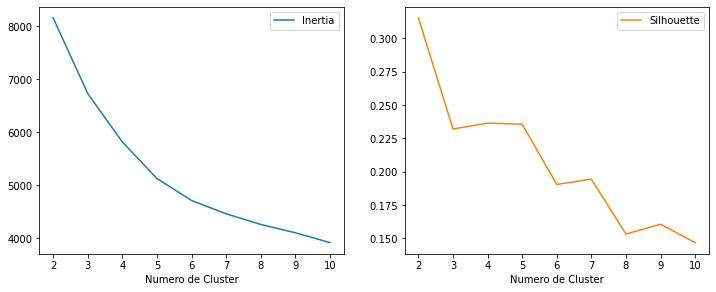

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
comparacao.plot(ax= ax, layout=(2,2), subplots = True)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
kmeans.fit(df2)
y_kmeans = kmeans.fit_predict(df2)
df['Cluster'] = kmeans.labels_
df.head()

,Player,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Cluster
0,Precious Achiuwa,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,0
1,Jaylen Adams,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,4
2,Steven Adams,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2
3,Bam Adebayo,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,3
4,LaMarcus Aldridge,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,1


In [23]:
df.query('Cluster == 3')[:50]

,Player,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Cluster
3,Bam Adebayo,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,3
11,Giannis Antetokounmpo,33.0,10.3,18.0,0.569,1.1,3.6,0.303,9.2,14.4,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,3
25,LaMelo Ball,28.8,5.7,13.2,0.436,1.8,5.1,0.352,3.9,8.1,...,1.2,4.7,5.9,6.1,1.6,0.4,2.8,2.7,15.7,3
30,RJ Barrett,34.9,6.5,14.7,0.441,1.7,4.3,0.401,4.8,10.4,...,0.9,4.8,5.8,3.0,0.7,0.3,1.9,2.6,17.6,3
37,Bradley Beal,35.8,11.2,23.0,0.485,2.2,6.2,0.349,9.0,16.8,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,3
57,Devin Booker,33.9,9.3,19.2,0.484,1.9,5.5,0.340,7.4,13.7,...,0.5,3.7,4.2,4.3,0.8,0.2,3.1,2.7,25.6,3
68,Malcolm Brogdon,34.5,7.9,17.5,0.453,2.6,6.7,0.388,5.3,10.8,...,1.0,4.2,5.3,5.9,0.9,0.3,2.1,2.0,21.2,3
73,Jaylen Brown,34.5,9.3,19.2,0.484,2.8,7.1,0.397,6.5,12.1,...,1.2,4.8,6.0,3.4,1.2,0.6,2.7,2.9,24.7,3
78,Elijah Bryant,32.0,6.0,13.0,0.462,1.0,5.0,0.200,5.0,8.0,...,2.0,4.0,6.0,3.0,0.0,1.0,4.0,4.0,16.0,3
83,Jimmy Butler,33.6,7.0,14.2,0.497,0.5,2.0,0.245,6.6,12.2,...,1.8,5.1,6.9,7.1,2.1,0.3,2.1,1.4,21.5,3
